# Homework 1


### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [1]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
    return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])
    return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
    # Generate figure.
    fig, axes = plt.subplots(3, 4, figsize=(32,16))
    st = fig.suptitle(
        "Learning Curves for all Tasks and Hyper-parameter settings",
        fontsize="x-large")
    # Plot all learning curves.
    for i, results in enumerate(experiment_data):
        for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
            # Plot.
            xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
            axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
            axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
            # Prettify individual plots.
            axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            axes[j, i].set_xlabel('Number of samples processed')
            axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
            axes[j, i].set_title('Task {}'.format(i + 1))
            axes[j, i].legend()
    # Prettify overall figure.
    plt.tight_layout()
    st.set_y(0.95)
    fig.subplots_adjust(top=0.91)

# Generate summary table of results.
def plot_summary_table(experiment_data):
    # Fill Data.
    cell_text = []
    rows = []
    columns = ['Setting 1', 'Setting 2', 'Setting 3']
    for i, results in enumerate(experiment_data):
        rows.append('Model {}'.format(i + 1))
        cell_text.append([])
        for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
            cell_text[i].append(test_accuracy[-1])
    # Generate Table.
    fig = plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(1, 4)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

/Users/Allen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [2]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [3]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
    print('epochs: %d, learning rate: %.5f' % (num_epochs, learning_rate))
    # Reset graph, recreate placeholders and dataset.
    tf.reset_default_graph()
    x, y_ = get_placeholders()
    y_true_cls = tf.placeholder(tf.int64, [None])
    mnist = get_data() # use for training.
    eval_mnist = get_data() # use for evaluation.
    test_true_cls = [label.argmax() for label in mnist.test.labels]
    train_true_cls = [label.argmax() for label in mnist.train.labels]
    
    print('training size: %d, testing size: %d' % (mnist.train.num_examples, mnist.test.num_examples))
    
    #####################################################
    # Define model, loss, update and evaluation metric. #
    #####################################################
    
    initializer = tf.contrib.layers.xavier_initializer()
    linear_layer = tf.Variable(initializer([784, 10]))
    bias = tf.Variable(initializer([10]))
    logits = tf.matmul(x, linear_layer) + bias
    softmax_layer = tf.nn.softmax(logits)
    pred_class = tf.argmax(softmax_layer, axis=1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax_layer, labels=y_)
    loss = tf.reduce_mean(cross_entropy)
    
    optimizer =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    prediction_check = tf.equal(y_true_cls, pred_class)
    accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))
    
    # Train.
    i, train_accuracy, test_accuracy = 0, [], []
    log_period_updates = int(log_period_samples / batch_size)
    with tf.train.MonitoredSession() as sess:        
        while mnist.train.epochs_completed < num_epochs:
            for i in range(mnist.train.num_examples // batch_size):
                # Update.
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
                #################
                # Training step #
                #################
                feed_data = {x: batch_xs, y_: batch_ys}
                sess.run(optimizer, feed_dict=feed_data)

                # Periodically evaluate.
                if i % log_period_updates == 0:

                    #####################################
                    # Compute and store train accuracy. #
                    #####################################
                    feed_data = {x: eval_mnist.train.images, y_: eval_mnist.train.labels, y_true_cls: train_true_cls}
                    train_acc = sess.run(accuracy, feed_dict=feed_data)
                    train_accuracy.append(train_acc)

                    #####################################
                    # Compute and store test accuracy.  #
                    #####################################
                    feed_data = {x: eval_mnist.test.images, y_: eval_mnist.test.labels, y_true_cls: test_true_cls}
                    test_acc = sess.run(accuracy, feed_dict=feed_data)
                    test_accuracy.append(test_acc)
                
                    print('epoch %d, step %d, training accuracy: %.5f, testing accuracy: %.5f' % 
                          (mnist.train.epochs_completed, i, train_acc, test_acc))
                
    experiments_task1.append(((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
epochs: 5, learning rate: 0.00010
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
training size: 55000, testing size: 10000
INFO:tensorflo

# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [4]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [5]:
print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
    print('epochs: %d, learning rate: %.5f' % (num_epochs, learning_rate))
    # Reset graph, recreate placeholders and dataset.
    tf.reset_default_graph()  # reset the tensorflow graph
    x, y_ = get_placeholders()
    y_true_cls = tf.placeholder(tf.int64, [None])
    mnist = get_data()  # use for training.
    eval_mnist = get_data() # use for evaluation.
    test_true_cls = [label.argmax() for label in mnist.test.labels]
    train_true_cls = [label.argmax() for label in mnist.train.labels]
    
    #####################################################
    # Define model, loss, update and evaluation metric. #
    #####################################################
    
    initializer = tf.contrib.layers.xavier_initializer()
    first_layer = tf.Variable(initializer([784, 32]))
    first_layer_bias = tf.Variable(initializer([32]))
    first_matmul = tf.matmul(x, first_layer) + first_layer_bias
    relu = tf.nn.relu(first_matmul)
    second_layer = tf.Variable(initializer([32, 10]))
    second_layer_bias = tf.Variable(initializer([10]))
    logits = tf.matmul(relu, second_layer) + second_layer_bias
    softmax_layer = tf.nn.softmax(logits)
    pred_class = tf.argmax(softmax_layer, axis=1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax_layer, labels=y_)
    loss = tf.reduce_mean(cross_entropy)
    
    optimizer =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    prediction_check = tf.equal(y_true_cls, pred_class)
    accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))
    
    # Train.
    i, train_accuracy, test_accuracy = 0, [], []
    log_period_updates = int(log_period_samples / batch_size)
    with tf.train.MonitoredSession() as sess:
        while mnist.train.epochs_completed < num_epochs:
            for i in range(mnist.train.num_examples // batch_size):
                # Update.
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
                #################
                # Training step #
                #################
                feed_data = {x: batch_xs, y_: batch_ys}
                sess.run(optimizer, feed_dict=feed_data)

                # Periodically evaluate.
                if i % log_period_updates == 0:

                    #####################################
                    # Compute and store train accuracy. #
                    #####################################
                    feed_data = {x: eval_mnist.train.images, y_: eval_mnist.train.labels, y_true_cls: train_true_cls}
                    train_acc = sess.run(accuracy, feed_dict=feed_data)
                    train_accuracy.append(train_acc)

                    #####################################
                    # Compute and store test accuracy.  #
                    #####################################
                    feed_data = {x: eval_mnist.test.images, y_: eval_mnist.test.labels, y_true_cls: test_true_cls}
                    test_acc = sess.run(accuracy, feed_dict=feed_data)
                    test_accuracy.append(test_acc)
                
                    print('epoch %d, step %d, training accuracy: %.5f, testing accuracy: %.5f' % 
                          (mnist.train.epochs_completed, i, train_acc, test_acc))
            

    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
epochs: 15, learning rate: 0.00010
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
epoch 0, step 0, training accuracy: 0.08471, testing accuracy: 0.08270
epoch 0, step 200, training accuracy: 0.08527, testing accuracy: 0.08300
epoch 0, step 400, training accuracy: 0.08611, testing accuracy: 0.08370
epoch 1, step 0, training accuracy: 0.08664, testing accuracy: 0.08410
epoch 1, step 200, training accuracy: 0.08744, testing accuracy: 0.08470
epoch 1, step 400, training accuracy: 0.08811, testing accuracy: 0.08510
epoch 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
epoch 0, step 0, training accuracy: 0.09656, testing accuracy: 0.09150
epoch 0, step 200, training accuracy: 0.60576, testing accuracy: 0.61440
epoch 0, step 400, training accuracy: 0.71560, testing accuracy: 0.72870
epoch 1, step 0, training accuracy: 0.72647, testing accuracy: 0.73820
epoch 1, step 200, training accuracy: 0.80864, testing accuracy: 0.81840
epoch 1, step 400, training accuracy: 0.82489, testing accuracy: 0.83240
epoch 2, step 0, training accuracy: 0.82864, testing accuracy: 0.83550
epoch 2, step 200, training accuracy: 0.83242, testing accuracy: 0.83970
epoch 2, step 400, training accuracy: 0.83658, testing accuracy: 0.84190
epoch 3, step 0, training accuracy:

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [6]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [7]:
print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
    # Reset graph, recreate placeholders and dataset.
    tf.reset_default_graph()  # reset the tensorflow graph
    x, y_ = get_placeholders()
    y_true_cls = tf.placeholder(tf.int64, [None])
    mnist = get_data()  # use for training.
    eval_mnist = get_data() # use for evaluation.
    test_true_cls = [label.argmax() for label in mnist.test.labels]
    train_true_cls = [label.argmax() for label in mnist.train.labels]

    #####################################################
    # Define model, loss, update and evaluation metric. #
    #####################################################

    initializer = tf.contrib.layers.xavier_initializer()
    first_layer = tf.Variable(initializer([784, 32]))
    first_layer_bias = tf.Variable(initializer([32]))
    first_matmul = tf.matmul(x, first_layer) + first_layer_bias
    first_relu = tf.nn.relu(first_matmul)
    
    second_layer = tf.Variable(initializer([32, 32]))
    second_layer_bias = tf.Variable(initializer([32]))
    second_matmul = tf.matmul(first_relu, second_layer) + second_layer_bias
    second_relu = tf.nn.relu(second_matmul)
    
    third_layer = tf.Variable(initializer([32, 10]))
    third_layer_bias = tf.Variable(initializer([10]))
    logits = tf.matmul(second_relu, third_layer) + third_layer_bias
    softmax_layer = tf.nn.softmax(logits)
    pred_class = tf.argmax(softmax_layer, axis=1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax_layer, labels=y_)
    loss = tf.reduce_mean(cross_entropy)
    
    optimizer =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    prediction_check = tf.equal(y_true_cls, pred_class)
    accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))
    
    # Train.
    i, train_accuracy, test_accuracy = 0, [], []
    log_period_updates = int(log_period_samples / batch_size)
    with tf.train.MonitoredSession() as sess:
        while mnist.train.epochs_completed < num_epochs:
            for i in range(mnist.train.num_examples // batch_size):
                # Update.
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
                #################
                # Training step #
                #################
                feed_data = {x: batch_xs, y_: batch_ys}
                sess.run(optimizer, feed_dict=feed_data)

                # Periodically evaluate.
                if i % log_period_updates == 0:

                    #####################################
                    # Compute and store train accuracy. #
                    #####################################
                    feed_data = {x: eval_mnist.train.images, y_: eval_mnist.train.labels, y_true_cls: train_true_cls}
                    train_acc = sess.run(accuracy, feed_dict=feed_data)
                    train_accuracy.append(train_acc)

                    #####################################
                    # Compute and store test accuracy.  #
                    #####################################
                    feed_data = {x: eval_mnist.test.images, y_: eval_mnist.test.labels, y_true_cls: test_true_cls}
                    test_acc = sess.run(accuracy, feed_dict=feed_data)
                    test_accuracy.append(test_acc)
                
                    print('epoch %d, step %d, training accuracy: %.5f, testing accuracy: %.5f' % 
                          (mnist.train.epochs_completed, i, train_acc, test_acc))

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
epoch 0, step 0, training accuracy: 0.09289, testing accuracy: 0.09010
epoch 0, step 200, training accuracy: 0.10671, testing accuracy: 0.10700
epoch 0, step 400, training accuracy: 0.12229, testing accuracy: 0.12280
epoch 1, step 0, training accuracy: 0.13476, testing accuracy: 0.13700
epoch 1, step 200, training accuracy: 0.15547, testing accuracy: 0.15680
epoch 1, step 400, training accuracy: 0.17820, testing accuracy: 0.17910
epoch 2, step 0, training accuracy: 0.197

epoch 27, step 0, training accuracy: 0.78016, testing accuracy: 0.79210
epoch 27, step 200, training accuracy: 0.78302, testing accuracy: 0.79490
epoch 27, step 400, training accuracy: 0.78462, testing accuracy: 0.79580
epoch 28, step 0, training accuracy: 0.78633, testing accuracy: 0.79740
epoch 28, step 200, training accuracy: 0.78829, testing accuracy: 0.79850
epoch 28, step 400, training accuracy: 0.79065, testing accuracy: 0.80090
epoch 29, step 0, training accuracy: 0.79131, testing accuracy: 0.80250
epoch 29, step 200, training accuracy: 0.79267, testing accuracy: 0.80410
epoch 29, step 400, training accuracy: 0.79436, testing accuracy: 0.80510
epoch 30, step 0, training accuracy: 0.79545, testing accuracy: 0.80610
epoch 30, step 200, training accuracy: 0.79635, testing accuracy: 0.80700
epoch 30, step 400, training accuracy: 0.79738, testing accuracy: 0.80850
epoch 31, step 0, training accuracy: 0.79878, testing accuracy: 0.80850
epoch 31, step 200, training accuracy: 0.79996, 

epoch 21, step 200, training accuracy: 0.76635, testing accuracy: 0.75610
epoch 21, step 400, training accuracy: 0.76655, testing accuracy: 0.75650
epoch 22, step 0, training accuracy: 0.76738, testing accuracy: 0.75620
epoch 22, step 200, training accuracy: 0.76735, testing accuracy: 0.75650
epoch 22, step 400, training accuracy: 0.76724, testing accuracy: 0.75680
epoch 23, step 0, training accuracy: 0.76838, testing accuracy: 0.75710
epoch 23, step 200, training accuracy: 0.76920, testing accuracy: 0.75820
epoch 23, step 400, training accuracy: 0.76873, testing accuracy: 0.75820
epoch 24, step 0, training accuracy: 0.76913, testing accuracy: 0.75860
epoch 24, step 200, training accuracy: 0.76844, testing accuracy: 0.75760
epoch 24, step 400, training accuracy: 0.77002, testing accuracy: 0.75800
epoch 25, step 0, training accuracy: 0.77015, testing accuracy: 0.75970
epoch 25, step 200, training accuracy: 0.76973, testing accuracy: 0.75970
epoch 25, step 400, training accuracy: 0.77027

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [8]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [9]:
print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
    # Reset graph, recreate placeholders and dataset.
    tf.reset_default_graph()  # reset the tensorflow graph
    x, y_ = get_placeholders()
    y_true_cls = tf.placeholder(tf.int64, [None])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    mnist = get_data()  # use for training.
    eval_mnist = get_data()  # use for evaluation.
    test_true_cls = [label.argmax() for label in mnist.test.labels]
    train_true_cls = [label.argmax() for label in mnist.train.labels]
    
    #####################################################
    # Define model, loss, update and evaluation metric. #
    #####################################################
    
    initializer = tf.contrib.layers.xavier_initializer()
    
    conv1_weights = tf.Variable(initializer([3, 3, 1, 8]))
    conv1_bias = tf.Variable(initializer([8]))
    conv1 = tf.nn.conv2d(input=x_image,
                         filter=conv1_weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    conv1 += conv1_bias
    conv1 = tf.nn.max_pool(value=conv1,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')

    conv2_weights = tf.Variable(initializer([3, 3, 8, 8]))
    conv2_bias = tf.Variable(initializer([8]))
    conv2 = tf.nn.conv2d(input=conv1,
                         filter=conv2_weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    conv2 += conv2_bias
    conv2 = tf.nn.max_pool(value=conv2,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')
    
    layer_shape = conv2.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(conv2, [-1, num_features])
    
    first_layer = tf.Variable(initializer([num_features, 32]))
    first_layer_bias = tf.Variable(initializer([32]))
    first_matmul = tf.matmul(layer_flat, first_layer) + first_layer_bias
    first_relu = tf.nn.relu(first_matmul)
    
    second_layer = tf.Variable(initializer([32, 10]))
    second_layer_bias = tf.Variable(initializer([10]))
    logits = tf.matmul(first_relu, second_layer) + second_layer_bias
    softmax_layer = tf.nn.softmax(logits)
    pred_class = tf.argmax(softmax_layer, axis=1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax_layer, labels=y_)
    loss = tf.reduce_mean(cross_entropy)
    
    optimizer =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    prediction_check = tf.equal(y_true_cls, pred_class)
    accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))
    
    # Train.
    i, train_accuracy, test_accuracy = 0, [], []
    log_period_updates = int(log_period_samples / batch_size)
    with tf.train.MonitoredSession() as sess:
        while mnist.train.epochs_completed < num_epochs:
            for i in range(mnist.train.num_examples // batch_size):
                # Update.
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
                #################
                # Training step #
                #################
                feed_data = {x: batch_xs, y_: batch_ys}
                sess.run(optimizer, feed_dict=feed_data)

                # Periodically evaluate.
                if i % log_period_updates == 0:

                    #####################################
                    # Compute and store train accuracy. #
                    #####################################
                    feed_data = {x: eval_mnist.train.images, y_: eval_mnist.train.labels, y_true_cls: train_true_cls}
                    train_acc = sess.run(accuracy, feed_dict=feed_data)
                    train_accuracy.append(train_acc)

                    #####################################
                    # Compute and store test accuracy.  #
                    #####################################
                    feed_data = {x: eval_mnist.test.images, y_: eval_mnist.test.labels, y_true_cls: test_true_cls}
                    test_acc = sess.run(accuracy, feed_dict=feed_data)
                    test_accuracy.append(test_acc)
                
                    print('epoch %d, step %d, training accuracy: %.5f, testing accuracy: %.5f' % 
                          (mnist.train.epochs_completed, i, train_acc, test_acc))

    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
epoch 0, step 0, training accuracy: 0.09649, testing accuracy: 0.09820
epoch 0, step 200, training accuracy: 0.12631, testing accuracy: 0.12230
epoch 0, step 400, training accuracy: 0.16980, testing accuracy: 0.16760
epoch 1, step 0, training accuracy: 0.14769, testing accuracy: 0.14040
epoch 1, step 200, training accuracy: 0.14558, testing accuracy: 0.14090
epoch 1, step 400, training accuracy: 0.22735, testing accuracy: 0.22190
epoch 2, step 0, training accuracy: 0.362

epoch 13, step 400, training accuracy: 0.15635, testing accuracy: 0.16170
epoch 14, step 0, training accuracy: 0.14938, testing accuracy: 0.15420
epoch 14, step 200, training accuracy: 0.14084, testing accuracy: 0.14610
epoch 14, step 400, training accuracy: 0.13558, testing accuracy: 0.13960
epoch 15, step 0, training accuracy: 0.12878, testing accuracy: 0.13170
epoch 15, step 200, training accuracy: 0.11984, testing accuracy: 0.12330
epoch 15, step 400, training accuracy: 0.11522, testing accuracy: 0.11870
epoch 16, step 0, training accuracy: 0.11242, testing accuracy: 0.11490
epoch 16, step 200, training accuracy: 0.11005, testing accuracy: 0.11210
epoch 16, step 400, training accuracy: 0.10607, testing accuracy: 0.10760
epoch 17, step 0, training accuracy: 0.10465, testing accuracy: 0.10620
epoch 17, step 200, training accuracy: 0.10255, testing accuracy: 0.10350
epoch 17, step 400, training accuracy: 0.10202, testing accuracy: 0.10260
epoch 18, step 0, training accuracy: 0.10295, 

# Results

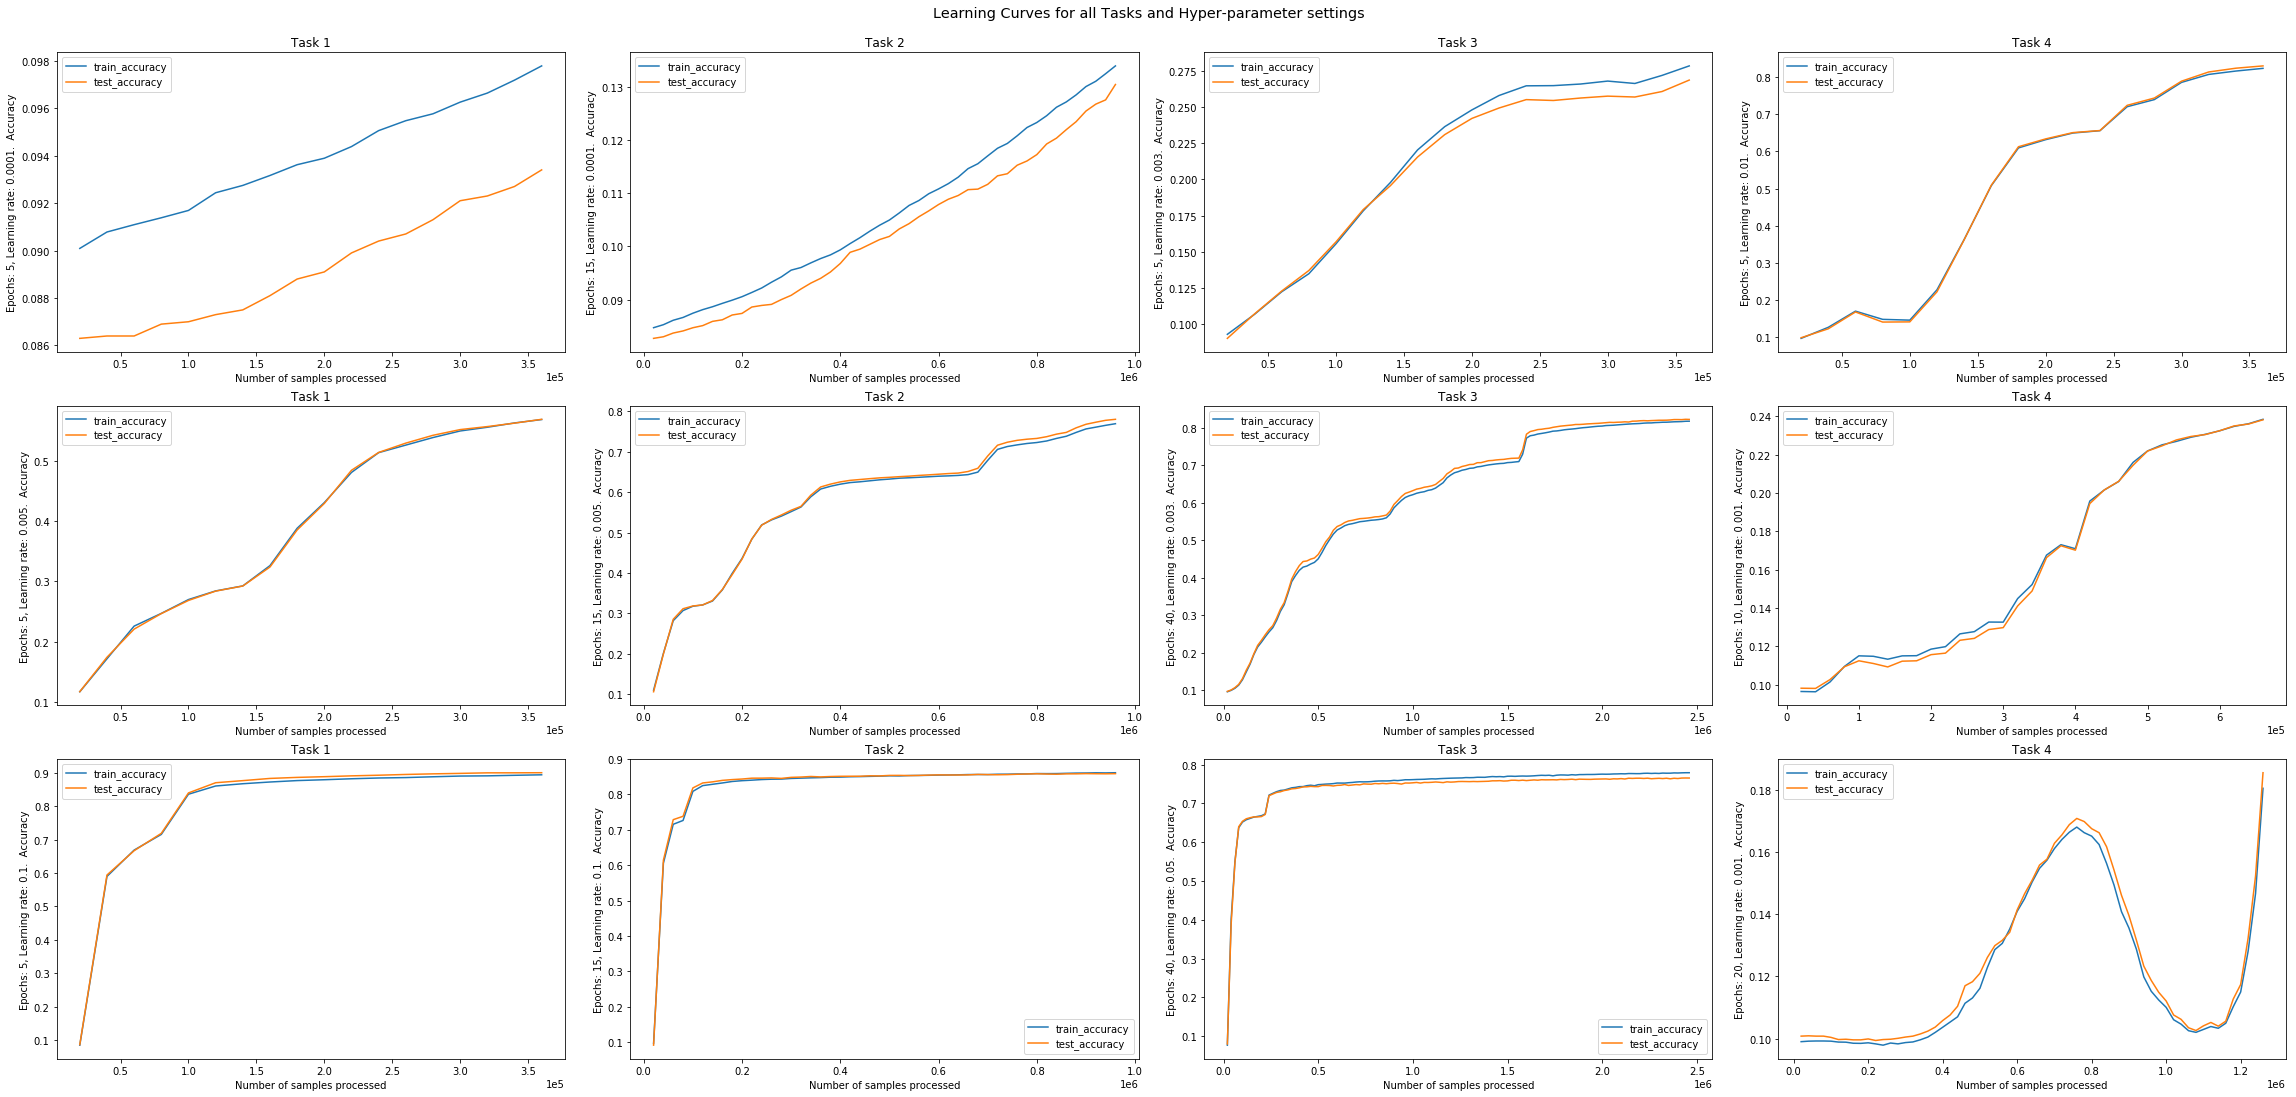

In [10]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

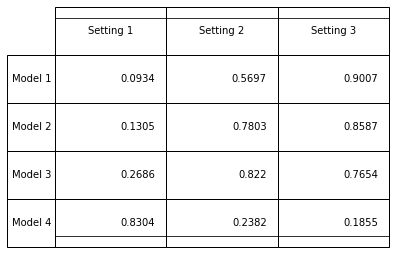

In [11]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

### Q1 (5 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

task 2, epoch 15 learning rate 0.0001.

### Q2 (5 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

low learning rate, small number of epochs

### Q3 (10 pts): How would you prevent over-/under-fitting from happening?

over-fitting: early stopping.
under-fitting: moderate/low learning rate and many epochs

# Extension (Ungraded)

In the previous tasks you have used plain Stohastic Gradient Descent to train the models.

There is a large literatures on variants of Stochastic Gradient Descent, that improve learning speed and robustness to hyper-parameters.

[Here](https://www.tensorflow.org/api_docs/python/train/optimizers) you can find the documentation for several optimizers already implemented in TensorFlow, as well as the original papers proposing these methods.*italicized text*.

AdamOptimizer and RMSProp are among the most commonly employed in Deep Learning.

How does replacing SGD with these optimizers affect the previous results?

In [12]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [13]:
print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
    # Reset graph, recreate placeholders and dataset.
    tf.reset_default_graph()  # reset the tensorflow graph
    x, y_ = get_placeholders()
    y_true_cls = tf.placeholder(tf.int64, [None])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    mnist = get_data()  # use for training.
    eval_mnist = get_data()  # use for evaluation.
    test_true_cls = [label.argmax() for label in mnist.test.labels]
    train_true_cls = [label.argmax() for label in mnist.train.labels]
    
    #####################################################
    # Define model, loss, update and evaluation metric. #
    #####################################################
    
    initializer = tf.contrib.layers.xavier_initializer()
    
    conv1_weights = tf.Variable(initializer([3, 3, 1, 8]))
    conv1_bias = tf.Variable(initializer([8]))
    conv1 = tf.nn.conv2d(input=x_image,
                         filter=conv1_weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    conv1 += conv1_bias
    conv1 = tf.nn.max_pool(value=conv1,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')

    conv2_weights = tf.Variable(initializer([3, 3, 8, 8]))
    conv2_bias = tf.Variable(initializer([8]))
    conv2 = tf.nn.conv2d(input=conv1,
                         filter=conv2_weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    conv2 += conv2_bias
    conv2 = tf.nn.max_pool(value=conv2,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')
    
    layer_shape = conv2.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(conv2, [-1, num_features])
    
    first_layer = tf.Variable(initializer([num_features, 32]))
    first_layer_bias = tf.Variable(initializer([32]))
    first_matmul = tf.matmul(layer_flat, first_layer) + first_layer_bias
    first_relu = tf.nn.relu(first_matmul)
    
    second_layer = tf.Variable(initializer([32, 10]))
    second_layer_bias = tf.Variable(initializer([10]))
    logits = tf.matmul(first_relu, second_layer) + second_layer_bias
    softmax_layer = tf.nn.softmax(logits)
    pred_class = tf.argmax(softmax_layer, axis=1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax_layer, labels=y_)
    loss = tf.reduce_mean(cross_entropy)
    
    optimizer =  tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.9, beta2=0.999).minimize(loss)
    prediction_check = tf.equal(y_true_cls, pred_class)
    accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))
    
    # Train.
    i, train_accuracy, test_accuracy = 0, [], []
    log_period_updates = int(log_period_samples / batch_size)
    with tf.train.MonitoredSession() as sess:
        while mnist.train.epochs_completed < num_epochs:
            for i in range(mnist.train.num_examples // batch_size):
                # Update.
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
                #################
                # Training step #
                #################
                feed_data = {x: batch_xs, y_: batch_ys}
                sess.run(optimizer, feed_dict=feed_data)

                # Periodically evaluate.
                if i % log_period_updates == 0:

                    #####################################
                    # Compute and store train accuracy. #
                    #####################################
                    feed_data = {x: eval_mnist.train.images, y_: eval_mnist.train.labels, y_true_cls: train_true_cls}
                    train_acc = sess.run(accuracy, feed_dict=feed_data)
                    train_accuracy.append(train_acc)

                    #####################################
                    # Compute and store test accuracy.  #
                    #####################################
                    feed_data = {x: eval_mnist.test.images, y_: eval_mnist.test.labels, y_true_cls: test_true_cls}
                    test_acc = sess.run(accuracy, feed_dict=feed_data)
                    test_accuracy.append(test_acc)
                
                    print('epoch %d, step %d, training accuracy: %.5f, testing accuracy: %.5f' % 
                          (mnist.train.epochs_completed, i, train_acc, test_acc))

    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
epoch 0, step 0, training accuracy: 0.14491, testing accuracy: 0.14180
epoch 0, step 200, training accuracy: 0.75436, testing accuracy: 0.76040
epoch 0, step 400, training accuracy: 0.84096, testing accuracy: 0.84360
epoch 1, step 0, training accuracy: 0.85027, testing accuracy: 0.85550
epoch 1, step 200, training accuracy: 0.85665, testing accuracy: 0.85930
epoch 1, step 400, training accuracy: 0.82125, testing accuracy: 0.82000
epoch 2, step 0, training accuracy: 0.910

epoch 13, step 400, training accuracy: 0.98615, testing accuracy: 0.98080
epoch 14, step 0, training accuracy: 0.98658, testing accuracy: 0.98190
epoch 14, step 200, training accuracy: 0.98442, testing accuracy: 0.98040
epoch 14, step 400, training accuracy: 0.98489, testing accuracy: 0.98120
epoch 15, step 0, training accuracy: 0.98615, testing accuracy: 0.98210
epoch 15, step 200, training accuracy: 0.98633, testing accuracy: 0.98070
epoch 15, step 400, training accuracy: 0.98804, testing accuracy: 0.98220
epoch 16, step 0, training accuracy: 0.98660, testing accuracy: 0.98180
epoch 16, step 200, training accuracy: 0.98795, testing accuracy: 0.98100
epoch 16, step 400, training accuracy: 0.98807, testing accuracy: 0.98290
epoch 17, step 0, training accuracy: 0.98778, testing accuracy: 0.98220
epoch 17, step 200, training accuracy: 0.98856, testing accuracy: 0.98270
epoch 17, step 400, training accuracy: 0.98755, testing accuracy: 0.98120
epoch 18, step 0, training accuracy: 0.98680, 

In [ ]:
plot_learning_curves([experiments_task5])